In [1]:
import torch
import torch.optim as optim
import torch.utils.data
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from plotting import plot_weights

In [120]:
#--- hyperparameters ---
N_EPOCHS = 50
BATCH_SIZE_TRAIN = 100
BATCH_SIZE_TEST = 100
LR = 0.001

In [112]:
CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
NUM_CLASSES = 10

In [4]:
# --- CIFAR initialization ---

# We transform torchvision.datasets.CIFAR10 outputs to tensors
# Plus, we add a random horizontal transformation to the training data
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor()])
test_transform = transforms.Compose([transforms.ToTensor()])
train_set = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=train_transform)
test_set = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=test_transform)

# Create Pytorch data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE_TEST, shuffle=False)

Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [44]:
def imshow(img):
    print("img",img)
    img = img / 2 + 0.5
    print("img2", img)
    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

torch.Size([100, 3, 32, 32])
tensor([2, 7, 7, 3, 9, 1, 8, 4, 4, 8, 6, 3, 7, 5, 7, 3, 3, 9, 5, 6, 9, 4, 4, 2,
        6, 5, 1, 9, 6, 3, 8, 2, 1, 5, 4, 3, 3, 3, 5, 3, 8, 0, 6, 8, 0, 4, 6, 2,
        5, 4, 5, 6, 3, 5, 5, 8, 0, 2, 0, 3, 0, 2, 5, 4, 8, 3, 1, 7, 8, 3, 6, 2,
        5, 4, 0, 2, 8, 5, 7, 2, 3, 5, 6, 9, 1, 2, 5, 4, 6, 5, 6, 0, 0, 3, 5, 0,
        9, 9, 3, 5])
img tensor([[[0.7725, 0.7804, 0.7765,  ..., 0.7333, 0.7333, 0.7490],
         [0.7804, 0.7882, 0.7843,  ..., 0.7490, 0.7451, 0.7608],
         [0.7765, 0.7804, 0.7804,  ..., 0.7490, 0.7451, 0.7608],
         ...,
         [0.7882, 0.7882, 0.7647,  ..., 0.7686, 0.7686, 0.7216],
         [0.7843, 0.7804, 0.7569,  ..., 0.7647, 0.7686, 0.7804],
         [0.7843, 0.7725, 0.7451,  ..., 0.7412, 0.7373, 0.7569]],

        [[0.7176, 0.7255, 0.7216,  ..., 0.6745, 0.6745, 0.6902],
         [0.7255, 0.7333, 0.7294,  ..., 0.6902, 0.6863, 0.6980],
         [0.7216, 0.7255, 0.7255,  ..., 0.6902, 0.6863, 0.7020],
         ...,
         [0

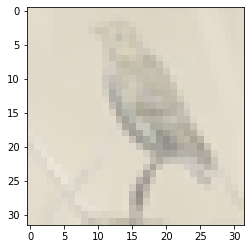

In [45]:
for (i,j) in train_loader:
    print(i.shape) # 100 x 3 x 32 x 32
    print(j)
    kuva = i[0]
    imshow(kuva)
    break
    
# data is ok! 

### Implementing CNN 

- The input:  BATCH SIZE TRAIN x NUM CHANNELS x WIDTH x HEIGHT,
    - where NUM CHANNELS=3 (R-G-B channels), and WIDTH=HEIGHT=32 (pixels)

- Please make sure your model includes at least two convolutional layers, followed by suitable non- linear functions and max pooling layers. Since there will be a rather large number of layers, please consider also to organize these layers into an torch.nn.Sequential module, which may result in cleaner code.


In [145]:
#--- model ---
class CNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(CNN, self).__init__()
        # WRITE CODE HERE
        
        # convolution 1 
        #non linear: relu, tanh, sigmoid
        # max pooling
        
        # convolution 2
        #non linear
        #max pooling
        
        #esimerkissä input kuvat on 28*28
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(8 * 8 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)
        
        

    def forward(self, x):
        # WRITE CODE HERE
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

CPU


Epoch 0 - Batch 0/500: Loss: 2.3264 | Train Acc: 16.000% (16/100)
Epoch 0 - Batch 1/500: Loss: 6.0502 | Train Acc: 17.000% (34/200)
Epoch 0 - Batch 2/500: Loss: 8.1193 | Train Acc: 17.667% (53/300)
Epoch 0 - Batch 3/500: Loss: 9.7890 | Train Acc: 14.750% (59/400)
Epoch 0 - Batch 4/500: Loss: 9.6798 | Train Acc: 15.000% (75/500)
Epoch 0 - Batch 5/500: Loss: 9.1469 | Train Acc: 15.000% (90/600)
Epoch 0 - Batch 6/500: Loss: 9.1922 | Train Acc: 15.429% (108/700)
Epoch 0 - Batch 7/500: Loss: 9.1601 | Train Acc: 15.750% (126/800)
Epoch 0 - Batch 8/500: Loss: 8.8891 | Train Acc: 16.000% (144/900)
Epoch 0 - Batch 9/500: Loss: 8.5854 | Train Acc: 16.400% (164/1000)
Epoch 0 - Batch 10/500: Loss: 8.2362 | Train Acc: 17.182% (189/1100)
Epoch 0 - Batch 11/500: Loss: 7.9776 | Train Acc: 17.500% (210/1200)
Epoch 0 - Batch 12/500: Loss: 7.7576 | Train Acc: 17.308% (225/1300)
Epoch 0 - Batch 13/500: Loss: 7.5066 | Train Acc: 17.500% (245/1400)
Epoch 0 - Batch 14/500: Loss: 7.2410 | Train Acc: 17.933% (

Epoch 0 - Batch 118/500: Loss: 2.7390 | Train Acc: 30.479% (3627/11900)
Epoch 0 - Batch 119/500: Loss: 2.7300 | Train Acc: 30.592% (3671/12000)
Epoch 0 - Batch 120/500: Loss: 2.7219 | Train Acc: 30.653% (3709/12100)
Epoch 0 - Batch 121/500: Loss: 2.7144 | Train Acc: 30.705% (3746/12200)
Epoch 0 - Batch 122/500: Loss: 2.7070 | Train Acc: 30.724% (3779/12300)
Epoch 0 - Batch 123/500: Loss: 2.6992 | Train Acc: 30.774% (3816/12400)
Epoch 0 - Batch 124/500: Loss: 2.6915 | Train Acc: 30.856% (3857/12500)
Epoch 0 - Batch 125/500: Loss: 2.6852 | Train Acc: 30.905% (3894/12600)
Epoch 0 - Batch 126/500: Loss: 2.6772 | Train Acc: 30.984% (3935/12700)
Epoch 0 - Batch 127/500: Loss: 2.6690 | Train Acc: 31.156% (3988/12800)
Epoch 0 - Batch 128/500: Loss: 2.6604 | Train Acc: 31.279% (4035/12900)
Epoch 0 - Batch 129/500: Loss: 2.6540 | Train Acc: 31.331% (4073/13000)
Epoch 0 - Batch 130/500: Loss: 2.6464 | Train Acc: 31.412% (4115/13100)
Epoch 0 - Batch 131/500: Loss: 2.6377 | Train Acc: 31.492% (4157

Epoch 0 - Batch 232/500: Loss: 2.1598 | Train Acc: 37.107% (8646/23300)
Epoch 0 - Batch 233/500: Loss: 2.1574 | Train Acc: 37.167% (8697/23400)
Epoch 0 - Batch 234/500: Loss: 2.1537 | Train Acc: 37.221% (8747/23500)
Epoch 0 - Batch 235/500: Loss: 2.1503 | Train Acc: 37.280% (8798/23600)
Epoch 0 - Batch 236/500: Loss: 2.1476 | Train Acc: 37.316% (8844/23700)
Epoch 0 - Batch 237/500: Loss: 2.1450 | Train Acc: 37.378% (8896/23800)
Epoch 0 - Batch 238/500: Loss: 2.1428 | Train Acc: 37.389% (8936/23900)
Epoch 0 - Batch 239/500: Loss: 2.1398 | Train Acc: 37.438% (8985/24000)
Epoch 0 - Batch 240/500: Loss: 2.1368 | Train Acc: 37.527% (9044/24100)
Epoch 0 - Batch 241/500: Loss: 2.1350 | Train Acc: 37.554% (9088/24200)
Epoch 0 - Batch 242/500: Loss: 2.1315 | Train Acc: 37.634% (9145/24300)
Epoch 0 - Batch 243/500: Loss: 2.1286 | Train Acc: 37.680% (9194/24400)
Epoch 0 - Batch 244/500: Loss: 2.1264 | Train Acc: 37.690% (9234/24500)
Epoch 0 - Batch 245/500: Loss: 2.1234 | Train Acc: 37.732% (9282

Epoch 0 - Batch 345/500: Loss: 1.9216 | Train Acc: 40.772% (14107/34600)
Epoch 0 - Batch 346/500: Loss: 1.9202 | Train Acc: 40.810% (14161/34700)
Epoch 0 - Batch 347/500: Loss: 1.9190 | Train Acc: 40.851% (14216/34800)
Epoch 0 - Batch 348/500: Loss: 1.9175 | Train Acc: 40.865% (14262/34900)
Epoch 0 - Batch 349/500: Loss: 1.9162 | Train Acc: 40.880% (14308/35000)
Epoch 0 - Batch 350/500: Loss: 1.9148 | Train Acc: 40.917% (14362/35100)
Epoch 0 - Batch 351/500: Loss: 1.9132 | Train Acc: 40.932% (14408/35200)
Epoch 0 - Batch 352/500: Loss: 1.9126 | Train Acc: 40.946% (14454/35300)
Epoch 0 - Batch 353/500: Loss: 1.9112 | Train Acc: 40.969% (14503/35400)
Epoch 0 - Batch 354/500: Loss: 1.9094 | Train Acc: 40.975% (14546/35500)
Epoch 0 - Batch 355/500: Loss: 1.9080 | Train Acc: 40.997% (14595/35600)
Epoch 0 - Batch 356/500: Loss: 1.9063 | Train Acc: 41.031% (14648/35700)
Epoch 0 - Batch 357/500: Loss: 1.9052 | Train Acc: 41.045% (14694/35800)
Epoch 0 - Batch 358/500: Loss: 1.9038 | Train Acc: 

Epoch 0 - Batch 458/500: Loss: 1.7806 | Train Acc: 43.388% (19915/45900)
Epoch 0 - Batch 459/500: Loss: 1.7795 | Train Acc: 43.402% (19965/46000)
Epoch 0 - Batch 460/500: Loss: 1.7785 | Train Acc: 43.412% (20013/46100)
Epoch 0 - Batch 461/500: Loss: 1.7776 | Train Acc: 43.424% (20062/46200)
Epoch 0 - Batch 462/500: Loss: 1.7770 | Train Acc: 43.432% (20109/46300)
Epoch 0 - Batch 463/500: Loss: 1.7764 | Train Acc: 43.438% (20155/46400)
Epoch 0 - Batch 464/500: Loss: 1.7752 | Train Acc: 43.460% (20209/46500)
Epoch 0 - Batch 465/500: Loss: 1.7742 | Train Acc: 43.474% (20259/46600)
Epoch 0 - Batch 466/500: Loss: 1.7735 | Train Acc: 43.486% (20308/46700)
Epoch 0 - Batch 467/500: Loss: 1.7727 | Train Acc: 43.496% (20356/46800)
Epoch 0 - Batch 468/500: Loss: 1.7717 | Train Acc: 43.501% (20402/46900)
Epoch 0 - Batch 469/500: Loss: 1.7705 | Train Acc: 43.530% (20459/47000)
Epoch 0 - Batch 470/500: Loss: 1.7695 | Train Acc: 43.548% (20511/47100)
Epoch 0 - Batch 471/500: Loss: 1.7688 | Train Acc: 

Evaluating: Batch 73/100: Loss: 0.0163 | Test Acc: 51.311% (3797/7400)
Evaluating: Batch 74/100: Loss: 0.0170 | Test Acc: 51.320% (3849/7500)
Evaluating: Batch 75/100: Loss: 0.0163 | Test Acc: 51.368% (3904/7600)
Evaluating: Batch 76/100: Loss: 0.0163 | Test Acc: 51.377% (3956/7700)
Evaluating: Batch 77/100: Loss: 0.0171 | Test Acc: 51.372% (4007/7800)
Evaluating: Batch 78/100: Loss: 0.0179 | Test Acc: 51.380% (4059/7900)
Evaluating: Batch 79/100: Loss: 0.0170 | Test Acc: 51.425% (4114/8000)
Evaluating: Batch 80/100: Loss: 0.0176 | Test Acc: 51.432% (4166/8100)
Evaluating: Batch 81/100: Loss: 0.0174 | Test Acc: 51.439% (4218/8200)
Evaluating: Batch 82/100: Loss: 0.0172 | Test Acc: 51.373% (4264/8300)
Evaluating: Batch 83/100: Loss: 0.0177 | Test Acc: 51.298% (4309/8400)
Evaluating: Batch 84/100: Loss: 0.0166 | Test Acc: 51.224% (4354/8500)
Evaluating: Batch 85/100: Loss: 0.0143 | Test Acc: 51.267% (4409/8600)
Evaluating: Batch 86/100: Loss: 0.0150 | Test Acc: 51.276% (4461/8700)
Evalua

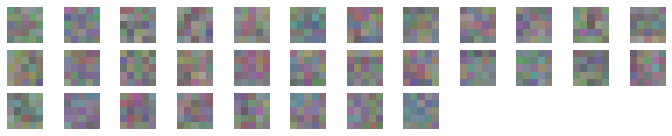

In [146]:
#--- set up ---
if __name__=='__main__':

    if torch.cuda.is_available():
        device = torch.device('cuda')
        print("CUDA")
    else:
        device = torch.device('cpu')
        print("CPU")

    model = CNN().to(device)

    # WRITE CODE HERE
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    loss_function = nn.CrossEntropyLoss()


    #--- training ---
    for epoch in range(1):
        train_loss = 0
        train_correct = 0
        total = 0
        for batch_num, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            # WRITE CODE HERE
            optimizer.zero_grad()
            
            output = model(data)
            
            loss = loss_function(output, target)

            loss.backward()
            optimizer.step()
            
            train_loss += loss
            total += BATCH_SIZE_TRAIN
            
            _, predicted = torch.max(output.data,1)
            correct = (predicted == target).sum()
            train_correct += correct
            
            

            print('Epoch %d - Batch %d/%d: Loss: %.4f | Train Acc: %.3f%% (%d/%d)' % (epoch, batch_num, len(train_loader), train_loss / (batch_num + 1), 100. * train_correct / total, train_correct, total))
    #--- test ---
    test_loss = 0
    test_correct = 0
    total = 0

    with torch.no_grad():
        for batch_num, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            # WRITE CODE HERE
            output = model(data)
            test_loss = loss_function(output,target)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            test_correct += (predicted == target).sum() 
            print('Evaluating: Batch %d/%d: Loss: %.4f | Test Acc: %.3f%% (%d/%d)' % (batch_num, len(test_loader), test_loss / (batch_num + 1), 100. * test_correct / total, test_correct, total))
            

    # WRITE CODE HERE
    #visualize weights for the first conv layer
    filters = model.modules()
    model_layers = [i for i in model.children()]
    first_layer = model_layers[0]
    conv_layer = first_layer[0]
    plot_weights(conv_layer.cpu())

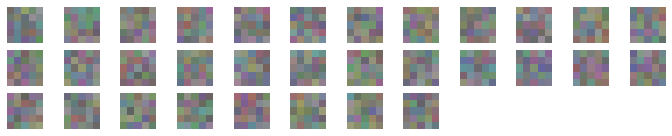